In [446]:
##Importing relevant modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, f1_score


In [447]:
#Reading in  the dataset
df = pd.read_csv(r"C:\Users\USER\AppData\Local\Temp\Temp1_archive (3).zip\heart.csv")

In [448]:
#Viewing and understanding the dataset
df.shape

(1025, 14)

In [449]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [450]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [452]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

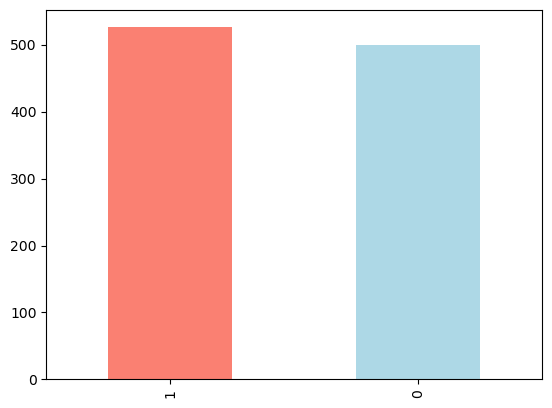

In [453]:
#checking to see if our target feature is balanced - Data is balanced
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [454]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


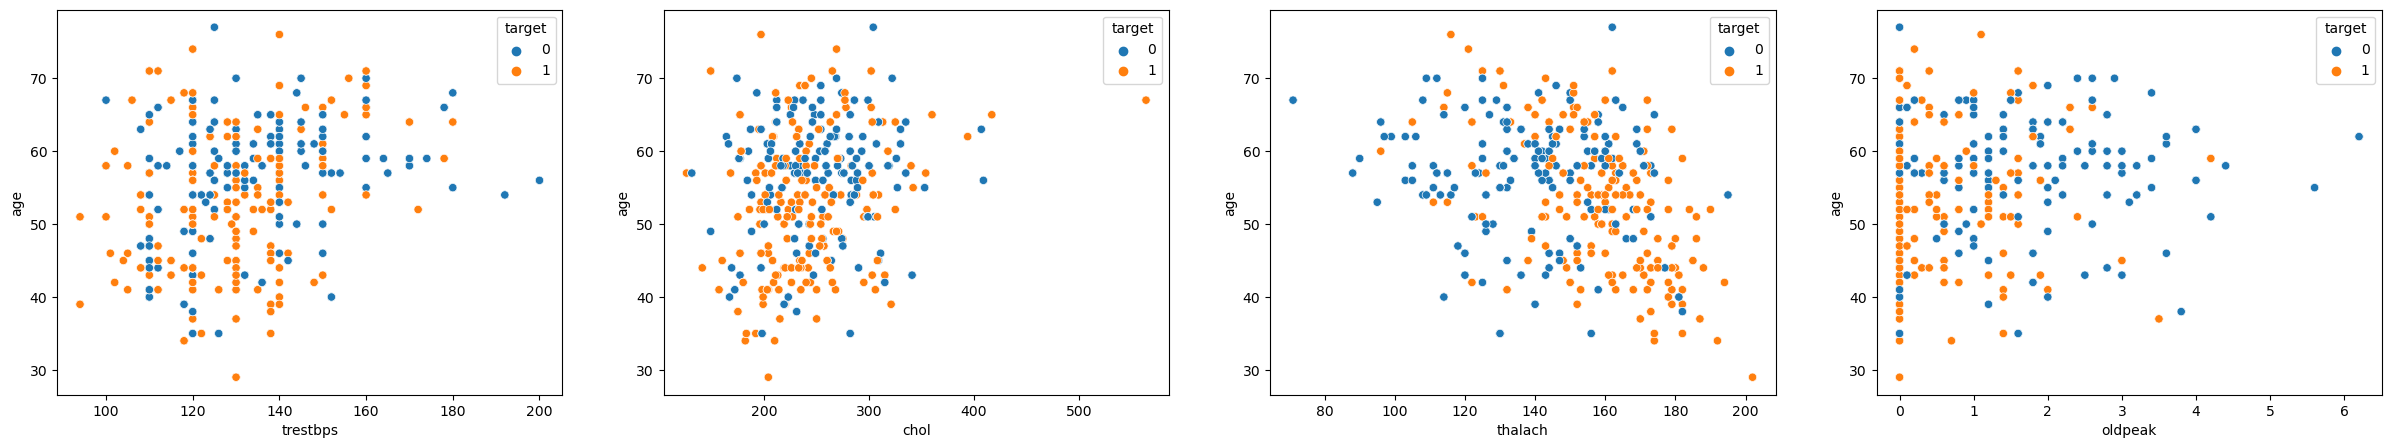

In [455]:
##Checking for outliers

fig, axs = plt.subplots(ncols=4, figsize=(30,5))
sns.scatterplot(x="trestbps", y="age", hue="target", data=df, ax=axs[0])
sns.scatterplot(x="chol", y="age", hue="target", data=df, ax=axs[1])
sns.scatterplot(x="thalach", y="age", hue="target", data=df, ax=axs[2])
sns.scatterplot(x="oldpeak", y="age", hue="target", data=df, ax=axs[3]);

In [456]:
#Checking to see how gender influences the possibility of having heart disease
#Found out that the gender distribution is skewed having more males
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

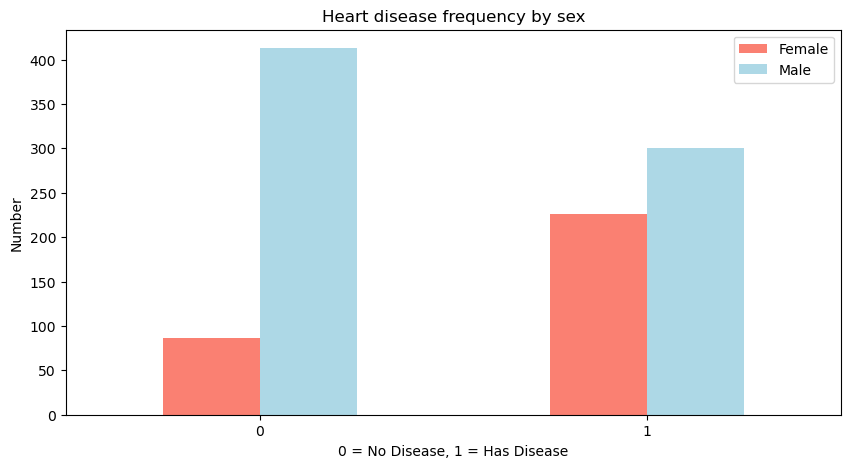

In [457]:
##Although skewed, the ratio of females who have the disease to that of those who dont, is higher than that of the males.

pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,5), color = ["salmon", "lightblue"])
plt.title ("Heart disease frequency by sex")
plt.xlabel("0 = No Disease, 1 = Has Disease")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

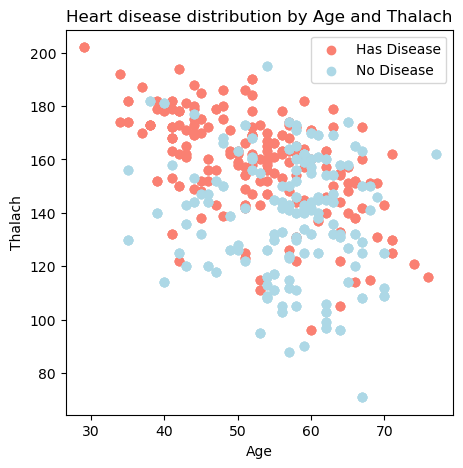

In [458]:
plt.figure(figsize =(5,5))
plt.scatter(df.age[df.target ==1], df.thalach[df.target ==1], c = "salmon")
plt.scatter(df.age[df.target ==0], df.thalach[df.target ==0], c = "lightblue")
plt.title ("Heart disease distribution by Age and Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Has Disease", "No Disease"])
plt.xticks(rotation = 0);


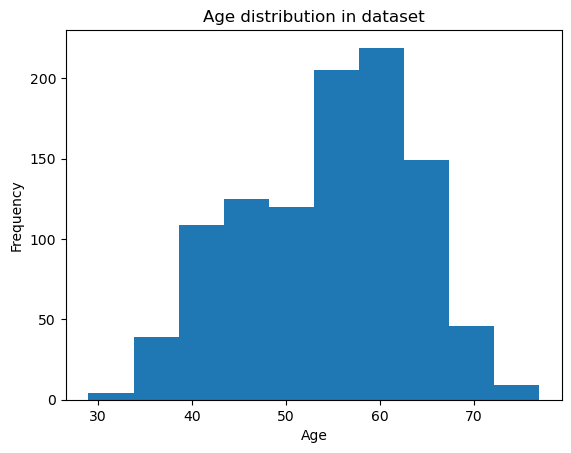

In [459]:
#Age plot gives a normal distribution with concentration around years 55 - 65
df.age.plot.hist()
plt.xlabel("Age")
plt.title ("Age distribution in dataset");

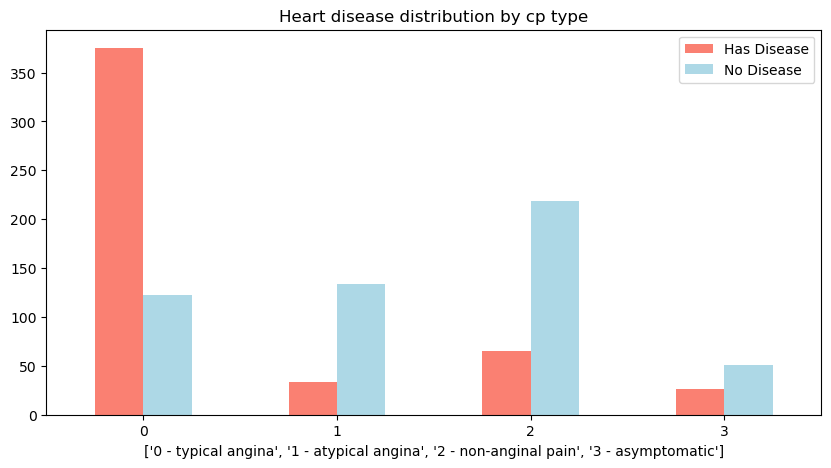

In [460]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,5), color = ["salmon", "lightblue"])
plt.title ("Heart disease distribution by cp type")
plt.xlabel(['0 - typical angina', '1 - atypical angina', '2 - non-anginal pain', '3 - asymptomatic'])
plt.legend(["Has Disease", "No Disease"])
plt.xticks(rotation = 0);

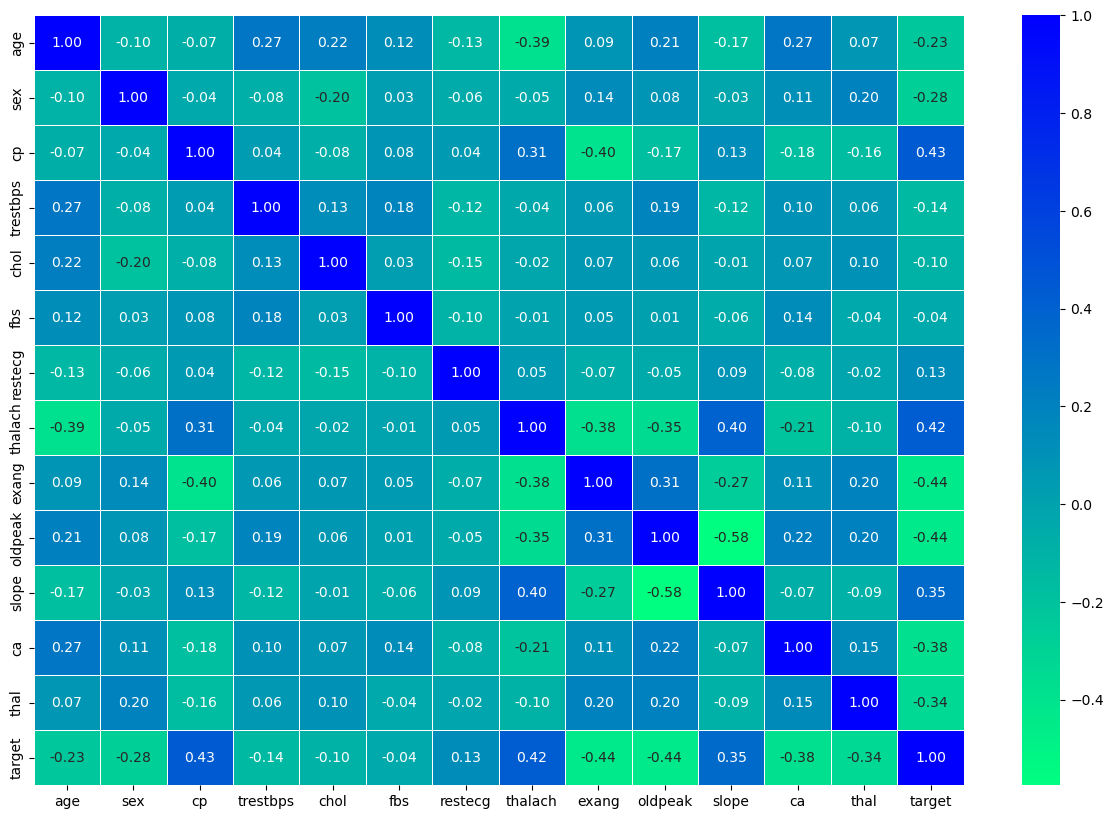

In [461]:
#Checking feature importance prior to modelling
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "winter_r")


In [462]:
#creating new dataset with chosen features

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [463]:
#splitting our dataset into training and test data to avoid overfitting

X = df.drop("target", axis = 1)
y = df["target"]

np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

len(X_train), len(X_test), len(y_train), len(y_test)

(717, 308, 717, 308)

In [464]:
np.random.seed(7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [465]:
models = {"SVM": LinearSVC(),
        "Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "RandomForestClassifier": RandomForestClassifier()}

In [466]:
def fit_and_score (model, X_train, X_test, y_train, y_test):
    np.random.seed(7)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [467]:
model_scores = fit_and_score(model = models,X_train = X_train, X_test = X_test, y_train = y_train,y_test = y_test)

In [468]:
model_scores

{'SVM': 0.8474025974025974,
 'Logistic Regression': 0.8376623376623377,
 'KNN': 0.827922077922078,
 'RandomForestClassifier': 0.9902597402597403}

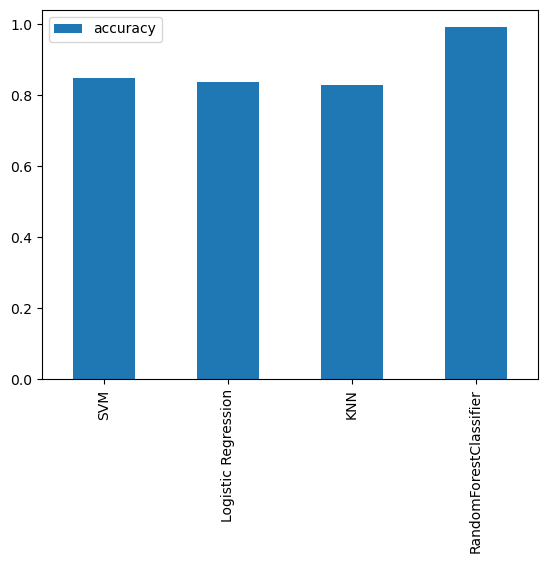

In [469]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])

model_compare.T.plot.bar();

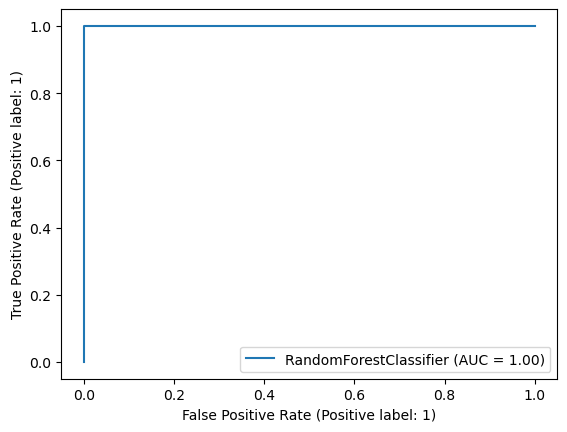

In [470]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

np.random.seed(7)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)


RocCurveDisplay.from_estimator(clf, X_test, y_test)

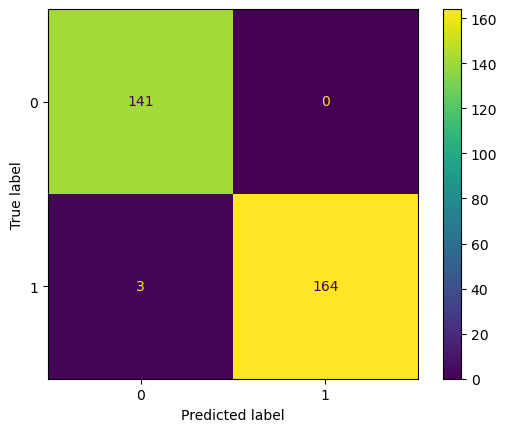

In [471]:
conf_mat = confusion_matrix(y_test, y_preds, labels = clf.classes_ )
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
display.plot()
plt.show()

In [472]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [473]:
cv_acc = np.mean(cross_val_score(clf, X, y, cv =5,scoring = "accuracy"))
cv_acc

0.9970731707317073

In [474]:
clf.feature_importances_


array([0.09430361, 0.03908668, 0.14034072, 0.07189138, 0.07848528,
       0.01019867, 0.01784884, 0.12328741, 0.06661234, 0.1034406 ,
       0.05629096, 0.12075429, 0.07745922])

In [478]:
feat_imp = list(clf.feature_importances_)

<AxesSubplot:title={'center':'Feature Importance'}>

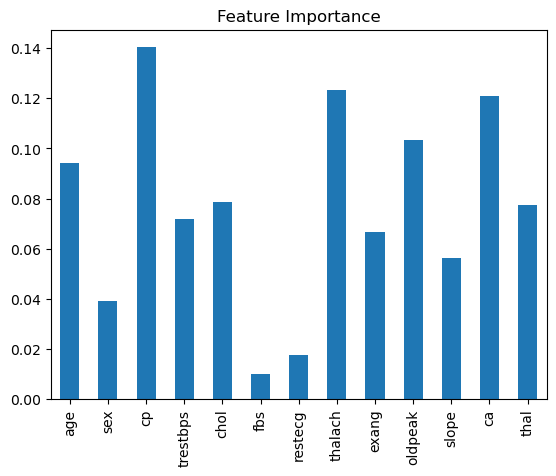

In [480]:
feat_dict = dict(zip((df.columns), feat_imp))

feat_df = pd.DataFrame(feat_dict, index = [0])

feat_df.T.plot.bar(title = "Feature Importance", legend = False)